<a href="https://colab.research.google.com/github/jerovernay/Laboratorio1/blob/main/Tp1/Tp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Queremos expresar un valor con formato hh:mm:ss.mmm en segundos con milisegundos como número decimal.

In [10]:
# Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

### **3. Leer el archivo**

In [11]:
# Leer el archivo (aquí se llama chronme.csv)
df = pd.read_csv("test01.csv", skiprows=1, sep=",", engine="python")
# Visualizar datos del archivo para saber dónde están los valores de tiempo medidos
df = df.drop(df.index[-1])
df = df.tail(20)
#print(df)
#print(df.columns)

### **4. Expresar el tiempo en segundos como un número decimal**


In [12]:
# Pasar la columna Start a segundos (con decimales) y guardarlo en un array
tiempos_array = pd.to_timedelta(df["Start"], errors="coerce").dt.total_seconds().dropna().to_numpy()

print(tiempos_array)

[1.903 2.015 2.183 1.806 2.023 2.087 1.895 1.967 1.952 2.032 1.984 1.935
 2.086 1.945 1.967 2.087 1.992 2.216 1.784 1.841]


### **5. Guardar los datos en un archivo txt**

In [13]:
# Guardar los datos de tiempos_array en un archivo txt (llamado tiempos.txt)
np.savetxt("tiempos.txt", tiempos_array, fmt='%.3f')


# Punto b)

In [14]:
datos = np.loadtxt('tiempos.txt')
N=len(datos)
print(N)
print(f'Número de mediciones= {N}')

20
Número de mediciones= 20


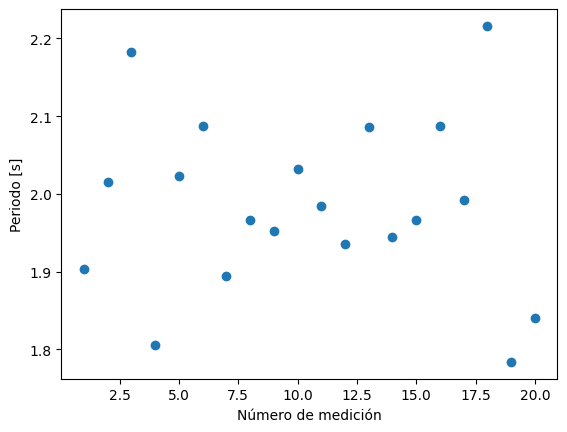

In [15]:
nro_medicion = np.arange(1,len(datos)+1,1)

plt.plot(nro_medicion, datos, marker = 'o', linestyle = '')
plt.xlabel('Número de medición')
plt.ylabel('Periodo [s]')
plt.show()

(array([2., 1., 2., 3., 4., 3., 1., 2., 0., 2.]),
 array([1.784 , 1.8272, 1.8704, 1.9136, 1.9568, 2.    , 2.0432, 2.0864,
        2.1296, 2.1728, 2.216 ]),
 <BarContainer object of 10 artists>)

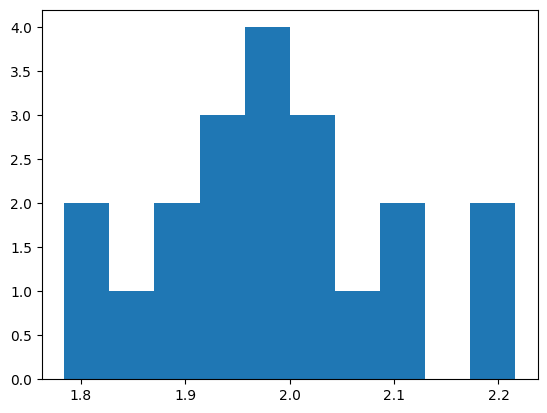

In [16]:
plt.hist(datos)

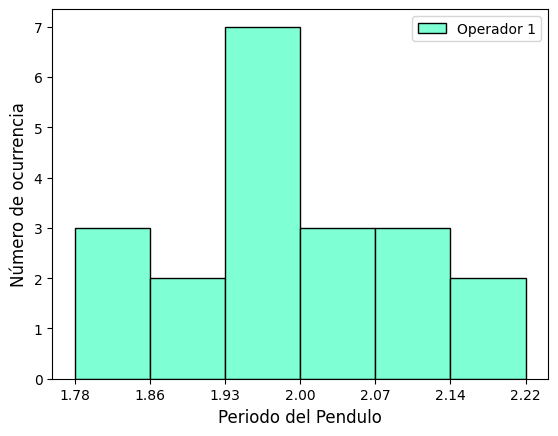

In [17]:
counts, bin_edges, patches = plt.hist(datos, bins='sturges', label='Operador 1', color='#7FFFD4', edgecolor='black')
plt.legend()
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))   # Fijar 2 decimales en el eje x
#plt.grid()
plt.xlabel('Periodo del Pendulo', fontsize=12)          # nombre eje x
plt.ylabel('Número de ocurrencia', fontsize=12)   # nombre eje y
_ = plt.xticks(bin_edges)      # para hacer coincidir las marcas del eje x con las barras del histograma

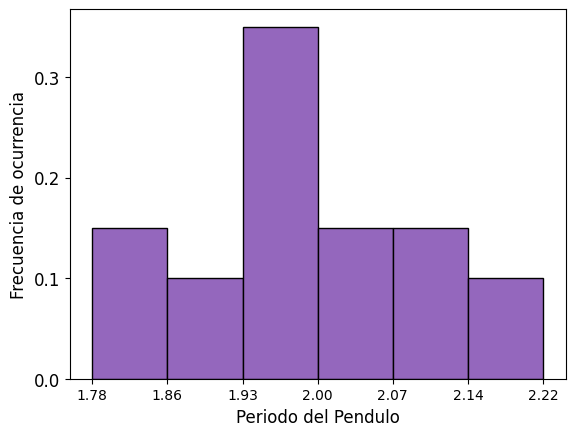

In [18]:
# Histograma de frecuencias relativas (normalizado por total de datos)
counts, bin_edges, patches = plt.hist(datos, bins=6, weights=np.ones(len(datos)) / len(datos), color='C04', edgecolor="black")
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))   # Fijar 2 decimales en el eje x
plt.ylabel('Frecuencia de ocurrencia', fontsize=12)       # leyenda eje x
plt.xlabel('Periodo del Pendulo', fontsize=12)                 # leyenda eje y
plt.xticks(bin_edges, fontsize=10)                             # marcas en el eje x
plt.yticks(np.arange(0, 0.35, 0.1), fontsize=12)          # marcas en el eje y
#np.arange(inicio, fin, paso) inicio: el primer valor del array (incluido); fin: el límite superior (no incluido); paso: diferencia entre elementos consecutivos
#plt.grid(True)       # grid lines
_ = plt.xticks(bin_edges)                                      # para hacer coincidir las marcas del eje x con las barras del histograma
plt.show()

#Punto c)

In [19]:
df2 = pd.read_csv("test02.csv", skiprows=1, sep=",", engine="python")
df2 = df2.drop(df2.index[-1]) # Drop the last row
#print(df2)

                      ## === Leo y paso a txt ===

tiempos_array02 = pd.to_timedelta(df2["Start"], errors="coerce").dt.total_seconds().dropna().to_numpy()

print(tiempos_array02)

np.savetxt("tiempos02.txt", tiempos_array02, fmt='%.3f')
medicion02 = np.loadtxt('tiempos02.txt')
N =len(medicion02)

# print(f'Número de mediciones= {N}')

[1.966 2.068 1.982 2.021 1.998 1.927 2.023 2.014 2.023 1.943 1.973 1.967
 1.975 2.015 1.982 1.959 2.007 2.023 1.922 2.015 2.056 1.951 2.022 2.029
 2.016 1.919 1.976 2.038 1.927 1.992 2.119 1.943 1.888 2.032 2.079 1.952
 2.055 2.029 2.025 2.104]


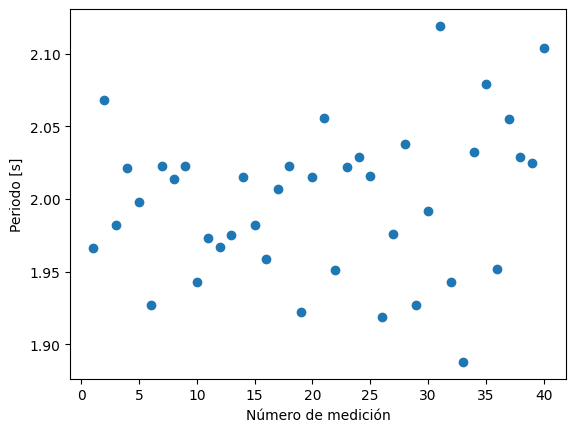

In [20]:
#   ====== ScatterPlot =====
scatter02 = np.arange(1,len(medicion02)+1,1)

plt.plot(scatter02, medicion02, marker = 'o', linestyle = '')
plt.xlabel('Número de medición')
plt.ylabel('Periodo [s]')
plt.show()

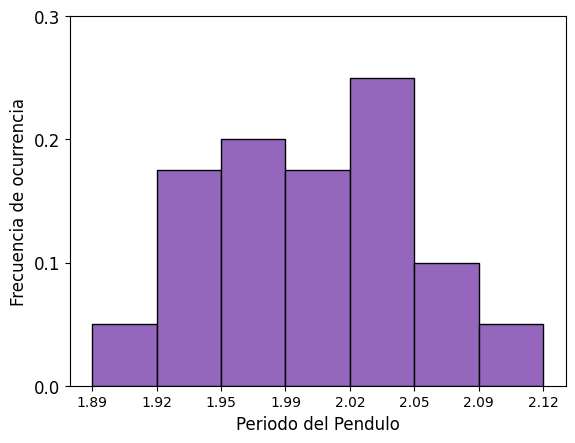

In [21]:
# Histograma de frecuencias relativas (normalizado por total de datos)
counts, bin_edges, patches = plt.hist(medicion02, bins=7, weights=np.ones(len(medicion02)) / len(medicion02), color='C04', edgecolor="black")
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))   # Fijar 2 decimales en el eje x
plt.ylabel('Frecuencia de ocurrencia', fontsize=12)       # leyenda eje x
plt.xlabel('Periodo del Pendulo', fontsize=12)                 # leyenda eje y
plt.xticks(bin_edges, fontsize=10)                             # marcas en el eje x
plt.yticks(np.arange(0, 0.35, 0.1), fontsize=12)          # marcas en el eje y
#np.arange(inicio, fin, paso) inicio: el primer valor del array (incluido); fin: el límite superior (no incluido); paso: diferencia entre elementos consecutivos
#plt.grid(True)       # grid lines
_ = plt.xticks(bin_edges)                                      # para hacer coincidir las marcas del eje x con las barras del histograma
plt.show()

#Punto d)

In [22]:
# Medimos los ultimos 40 datos  y los agrupamos en un grupo de 100

df3 = pd.read_csv("test03.csv", skiprows=1, sep=",", engine="python")
df3 = df3.drop(df3.index[-1]) # Drop the last row
#print(df3)

                      ## === Leo y paso a txt ===

tiempos_array03 = pd.to_timedelta(df3["Start"], errors="coerce").dt.total_seconds().dropna().to_numpy()

print(tiempos_array03)

np.savetxt("tiempos03.txt", tiempos_array03, fmt='%.3f')
medicion03 = np.loadtxt('tiempos03.txt')
N =len(medicion03)

print(f'Número de mediciones= {N}')

[2.101 1.942 1.998 2.015 1.991 2.006 2.103 1.95  2.031 1.99  1.919 2.023
 1.823 2.159 1.967 1.943 2.064 1.975 2.07  1.952 2.407 2.031 2.    1.991
 2.015 1.935 2.055 2.047 1.887 2.015 1.999 2.048 1.983 1.943 1.944 1.967
 2.152 2.04  1.864 2.343]
Número de mediciones= 40


In [23]:
# Cargar los datos de los tres archivos de texto
datos_combinados = np.concatenate((medicion02, medicion03, tiempos_array))

# Guardar los datos combinados en un nuevo archivo de texto
np.savetxt("tiempos_combinados.txt", datos_combinados, fmt='%.3f')

#print("Datos combinados guardados en 'tiempos_combinados.txt'")
np.savetxt("tiempos_combinados.txt", datos_combinados, fmt='%.3f')
medicion100 = np.loadtxt('tiempos_combinados.txt')
N =len(medicion100)

print(f'Número de mediciones= {N}')

Número de mediciones= 100


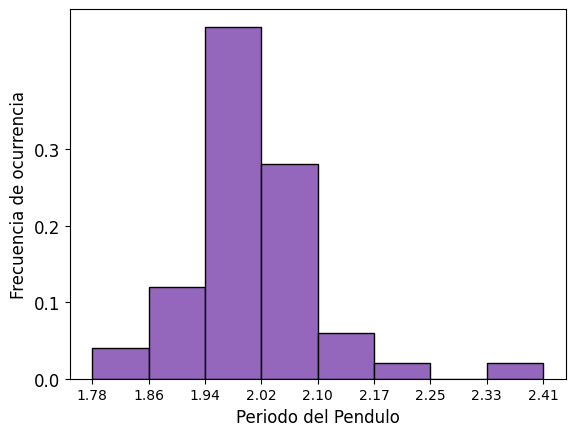

In [24]:
# Histograma de frecuencias relativas (normalizado por total de datos)
counts, bin_edges, patches = plt.hist(medicion100, bins=8, weights=np.ones(len(medicion100)) / len(medicion100), color='C04', edgecolor="black")
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))   # Fijar 2 decimales en el eje x
plt.ylabel('Frecuencia de ocurrencia', fontsize=12)       # leyenda eje x
plt.xlabel('Periodo del Pendulo', fontsize=12)                 # leyenda eje y
plt.xticks(bin_edges, fontsize=10)                             # marcas en el eje x
plt.yticks(np.arange(0, 0.35, 0.1), fontsize=12)          # marcas en el eje y
#np.arange(inicio, fin, paso) inicio: el primer valor del array (incluido); fin: el límite superior (no incluido); paso: diferencia entre elementos consecutivos
#plt.grid(True)       # grid lines
_ = plt.xticks(bin_edges)                                      # para hacer coincidir las marcas del eje x con las barras del histograma
plt.show()

In [25]:
# Medimos los ultimos 100 y los unimos al conjunto total. Terminamos por definir los bin sizes a partir de la regla de sturges

# Medimos los ultimos 100 datos  y los agrupamos en un grupo de 200

df4 = pd.read_csv("test04.csv", skiprows=1, sep=",", engine="python")
df4 = df4.drop(df4.index[-1]) # Drop the last row
#print(df3)

                      ## === Leo y paso a txt ===

tiempos_array04 = pd.to_timedelta(df4["Start"], errors="coerce").dt.total_seconds().dropna().to_numpy()

print(tiempos_array04)

np.savetxt("tiempos04.txt", tiempos_array04, fmt='%.3f')
medicion04 = np.loadtxt('tiempos04.txt')
N =len(medicion04)

print(f'Número de mediciones= {N}')

# Cargar los datos de los tres archivos de texto
datos_combinados200 = np.concatenate((medicion100, medicion04))

# Guardar los datos combinados en un nuevo archivo de texto
np.savetxt("combiacion200.txt", datos_combinados200, fmt='%.3f')

#print("Datos combinados guardados en 'tiempos_combinados.txt'")
np.savetxt("combiacion200.txt", datos_combinados200, fmt='%.3f')
medicion200_01 = np.loadtxt('combiacion200.txt')
N =len(medicion200_01)

print(f'Número de mediciones= {N}')

[1.925 1.94  2.043 1.98  1.98  1.949 1.997 2.068 1.827 2.132 1.925 2.029
 1.772 2.139 2.084 2.053 1.893 2.028 2.044 1.984 1.861 2.148 2.045 1.958
 1.932 2.037 2.085 1.861 2.11  1.893 2.013 2.061 1.869 2.11  1.965 2.117
 1.877 1.845 2.072 2.005 1.877 2.069 1.958 2.022 1.966 2.028 1.935 1.901
 2.078 2.046 1.966 1.94  2.072 1.909 2.015 1.942 1.919 2.03  2.07  2.033
 2.078 2.015 2.206 1.861 1.967 1.965 1.96  2.054 1.967 2.078 1.95  2.
 2.086 1.79  2.078 1.966 2.095 2.047 2.055 1.752 2.142 2.031 1.903 1.992
 2.006 1.999 2.016 1.95  1.975 1.991 2.071 1.968 1.984 1.952 2.071 1.951
 1.937 2.111 1.878 1.936]
Número de mediciones= 100
Número de mediciones= 200


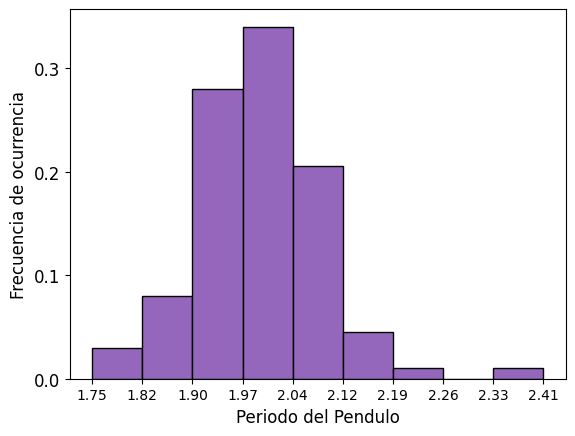

In [26]:
# Histograma de frecuencias relativas (normalizado por total de datos)
counts, bin_edges, patches = plt.hist(medicion200_01, bins=9, weights=np.ones(len(medicion200_01)) / len(medicion200_01), color='C04', edgecolor="black")
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))   # Fijar 2 decimales en el eje x
plt.ylabel('Frecuencia de ocurrencia', fontsize=12)       # leyenda eje x
plt.xlabel('Periodo del Pendulo', fontsize=12)                 # leyenda eje y
plt.xticks(bin_edges, fontsize=10)                             # marcas en el eje x
plt.yticks(np.arange(0, 0.35, 0.1), fontsize=12)          # marcas en el eje y
#np.arange(inicio, fin, paso) inicio: el primer valor del array (incluido); fin: el límite superior (no incluido); paso: diferencia entre elementos consecutivos
#plt.grid(True)       # grid lines
_ = plt.xticks(bin_edges)                                      # para hacer coincidir las marcas del eje x con las barras del histograma
plt.show()

#Punto 1b)


In [27]:
df200 = pd.read_csv("200_Jero.csv", skiprows=1, sep=",", engine="python")
df200 = df200.drop(df200.index[-1]) # Drop the last row
#print(df3)

                      ## === Leo y paso a txt ===

tiempos_array_Cambio = pd.to_timedelta(df200["Start"], errors="coerce").dt.total_seconds().dropna().to_numpy()

print(tiempos_array_Cambio)

np.savetxt("tiempos200.txt", tiempos_array_Cambio, fmt='%.3f')
medicion200_02 = np.loadtxt('tiempos200.txt')
N =len(medicion200_02)

print(f'Número de mediciones= {N}')

[2.088 1.927 2.071 2.137 1.839 2.056 1.921 2.016 1.833 2.128 1.903 2.024
 2.    2.033 1.84  1.985 2.04  2.056 1.993 1.882 2.008 2.2   1.713 2.112
 1.992 1.938 2.256 1.729 1.729 2.089 2.368 1.874 1.904 1.946 2.128 1.914
 1.977 1.937 2.002 1.921 1.993 1.994 1.962 2.042 1.937 2.178 1.922 1.977
 2.04  1.891 2.058 1.882 2.003 1.914 2.034 2.314 1.826 1.795 1.954 1.913
 2.722 1.962 2.02  2.034 1.987 1.988 1.906 2.044 1.945 2.115 1.97  1.931
 1.923 1.971 2.147 1.939 1.979 1.963 1.923 2.027 1.963 1.979 1.875 2.227
 3.923 1.964 1.908 1.932 1.932 1.928 2.099 2.107 1.995 1.937 2.093 1.876
 1.924 2.052 1.908 2.156 1.756 2.125 1.877 1.979 1.941 1.74  2.244 2.093
 1.899 2.061 1.9   2.053 2.013 2.108 1.852 1.853 2.1   1.532 2.248 2.124
 1.9   1.958 2.076 1.957 1.917 1.884 2.077 1.597 2.34  1.948 1.982 1.733
 2.101 2.286 2.252 1.67  1.957 1.917 1.892 1.982 2.006 2.045 1.997 1.989
 2.213 1.885 2.054 2.014 1.813 1.768 2.263 2.047 1.982 1.933 2.054 1.965
 1.998 1.989 1.982 2.047 2.134 1.959 2.    1.878 2.

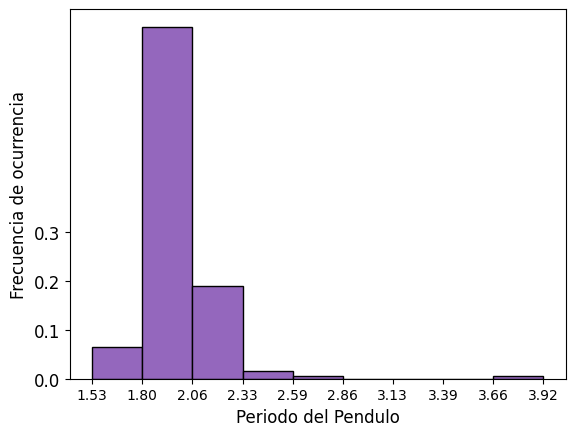

In [28]:
# Histograma de frecuencias relativas (normalizado por total de datos)
counts, bin_edges, patches = plt.hist(medicion200_02, bins=9, weights=np.ones(len(medicion200_02)) / len(medicion200_02), color='C04', edgecolor="black")
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))   # Fijar 2 decimales en el eje x
plt.ylabel('Frecuencia de ocurrencia', fontsize=12)       # leyenda eje x
plt.xlabel('Periodo del Pendulo', fontsize=12)                 # leyenda eje y
plt.xticks(bin_edges, fontsize=10)                             # marcas en el eje x
plt.yticks(np.arange(0, 0.35, 0.1), fontsize=12)          # marcas en el eje y
#np.arange(inicio, fin, paso) inicio: el primer valor del array (incluido); fin: el límite superior (no incluido); paso: diferencia entre elementos consecutivos
#plt.grid(True)       # grid lines
_ = plt.xticks(bin_edges)                                      # para hacer coincidir las marcas del eje x con las barras del histograma
plt.show()

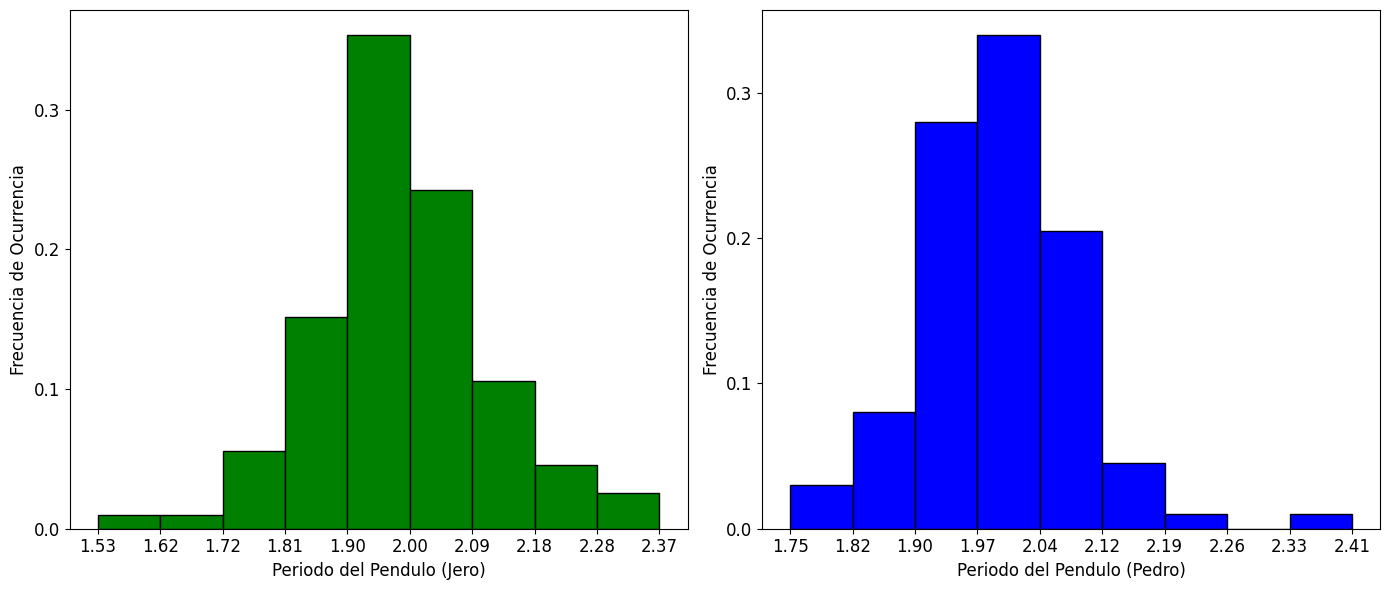

In [51]:
# Quitamos los valores atipicos de las dos mediciones para poder obtener datos que indiquen las mediciones de manera mas adecuada y asi comparar ambas mediciones mas claramente.

def quitar_atipicos(datos, limite_por_debajo, limite_por_arriba):
    recorte = datos[(datos >= limite_por_debajo) & (datos <= limite_por_arriba)]
    return recorte

mediciones_jero = quitar_atipicos(tiempos_array_Cambio, 1.4, 2.5) # medidas por jero
mediciones_pedro = quitar_atipicos(datos_combinados200, 1.4, 2.5) # medidas por pedro

np.savetxt("tiempos200_jero.txt", mediciones_jero, fmt='%.3f')
medicion200_jero = np.loadtxt('tiempos200_jero.txt')

np.savetxt("tiempos200_pedro.txt", mediciones_pedro, fmt='%.3f')
medicion200_pedro = np.loadtxt('tiempos200_pedro.txt')

# Creo los graficos uno al lado del otro para exponer mejor
figuras, equis = plt.subplots(1,2, figsize=(14,6))

# Histograma Jero
conteo_01, bordes_01, patches_01 = equis[0].hist(medicion200_jero, bins = 9, color="green", weights=np.ones(len(medicion200_jero)) / len(medicion200_jero), edgecolor = "black")
equis[0].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
equis[0].set_ylabel('Frecuencia de Ocurrencia', fontsize = 12)
equis[0].set_xlabel('Periodo del Pendulo (Jero)', fontsize = 12)
equis[0].set_xticks(bordes_01)
equis[0].set_yticks(np.arange(0, 0.35, 0.1))
equis[0].tick_params(axis='both', which='major', labelsize=12)  # Para cambiar tamaño de fuente de los ticks

# Histograma Pedro
conteo_02, bordes_02, patches_02 = equis[1].hist(medicion200_pedro, bins = 9, color="blue", weights=np.ones(len(medicion200_pedro)) / len(medicion200_pedro), edgecolor = "black")
equis[1].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
equis[1].set_ylabel('Frecuencia de Ocurrencia', fontsize = 12)
equis[1].set_xlabel('Periodo del Pendulo (Pedro)', fontsize = 12)
equis[1].set_xticks(bordes_02)
equis[1].set_yticks(np.arange(0, 0.35, 0.1))
equis[1].tick_params(axis='both', which='major', labelsize=12)  # Para cambiar tamaño de fuente de los ticks

plt.tight_layout()
plt.show()